In [ ]:
<img src = ""C:\Users\Pganesan\Documents\Day 73 - Pandas\LEGO+Notebook+and+Data+(start)\LEGO Notebook and Data (start)\assets\bricks.jpg">

In [5]:
import pandas as pd
import statistics

data = pd.read_csv("colors.csv")
print(data)

no_colors = data.groupby("name").count()
print(no_colors)

uniquecolor = data["name"].nunique()
print(uniquecolor)

Trans = data.groupby("is_trans").count()
print(Trans)

# colors.is_trans.value_counts() --> other way to find the count of trans

       id                          name     rgb is_trans
0      -1                       Unknown  0033B2        f
1       0                         Black  05131D        f
2       1                          Blue  0055BF        f
3       2                         Green  237841        f
4       3                Dark Turquoise  008F9B        f
..    ...                           ...     ...      ...
130  1004  Trans Flame Yellowish Orange  FCB76D        t
131  1005             Trans Fire Yellow  FBE890        t
132  1006        Trans Light Royal Blue  B4D4F7        t
133  1007                 Reddish Lilac  8E5597        f
134  9999                    [No Color]  05131D        f

[135 rows x 4 columns]
                 id  rgb  is_trans
name                              
Aqua              1    1         1
Black             1    1         1
Blue              1    1         1
Blue-Violet       1    1         1
Bright Green      1    1         1
...              ..  ...       ...
Violet      

  set_num                        name  year  theme_id  num_parts
0   001-1                       Gears  1965         1         43
1  0011-2           Town Mini-Figures  1978        84         12
2  0011-3  Castle 2 for 1 Bonus Offer  1987       199          0
3  0012-1          Space Mini-Figures  1979       143         12
4  0013-1          Space Mini-Figures  1979       143         12
           set_num                                 name  year  theme_id  \
15705      wwgp1-1  Wild West Limited Edition Gift Pack  1996       476   
15706   XMASTREE-1                       Christmas Tree  2019       410   
15707      XWING-1                  Mini X-Wing Fighter  2019       158   
15708      XWING-2                    X-Wing Trench Run  2019       158   
15709  YODACHRON-1      Yoda Chronicles Promotional Set  2013       158   

       num_parts  
15705          0  
15706         26  
15707         60  
15708         52  
15709        413  
year
1949     5
1950     6
1953     4
1954   

<BarContainer object of 10 artists>

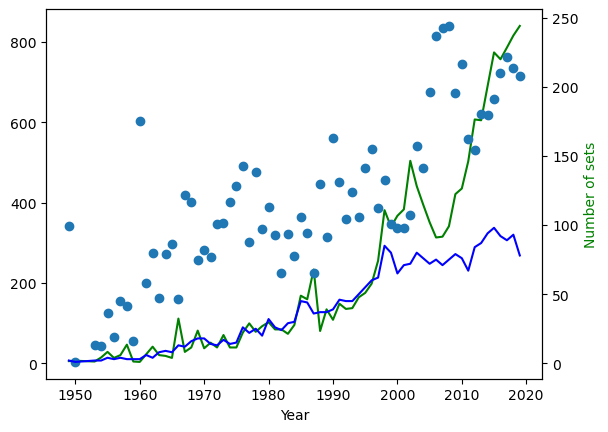

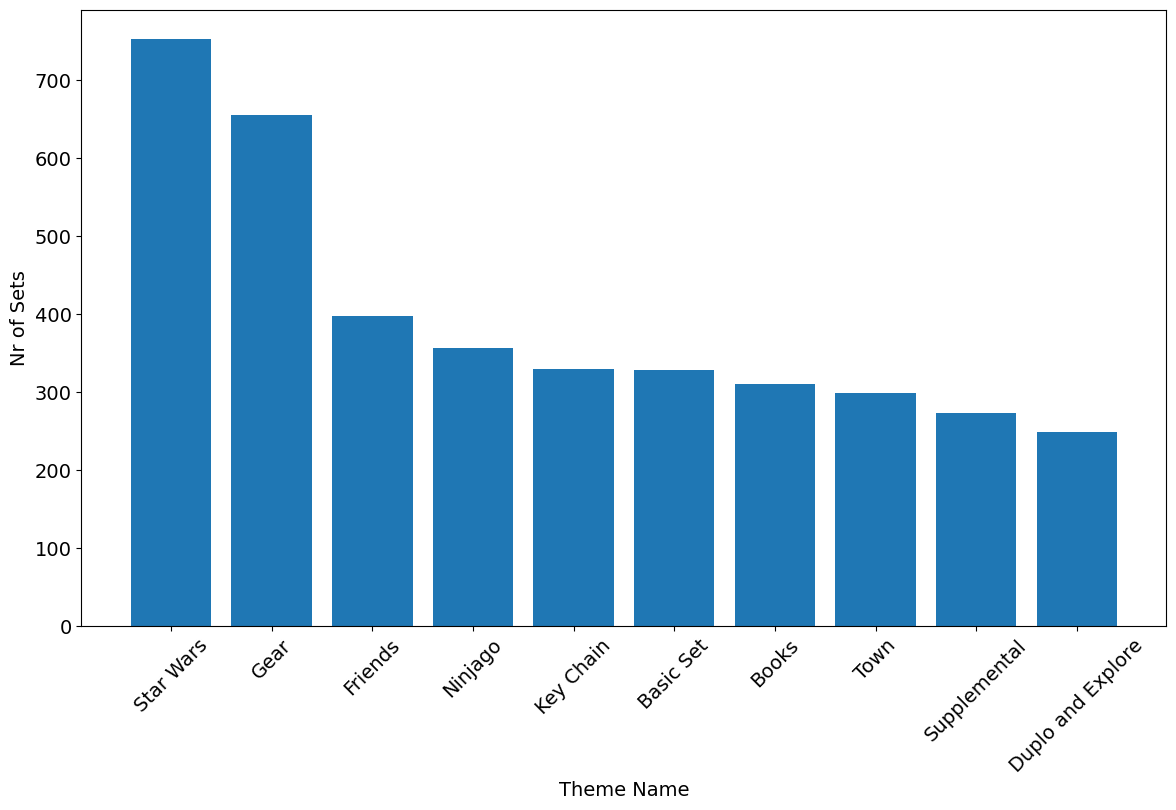

In [41]:
#exploring the data sets of lego colors

import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("sets.csv")

print(data.head())
print(data.tail())

first_lego_year = data["year"].min()
first_lego_year

data[data["year"] == 1949]

largest_value = data.sort_values(by = "num_parts",ascending = False)
largest_value

#To see lego per year
data_by_year = data.groupby("year").count()
print(data_by_year["set_num"].head())




#Using aggregate to see the set_num per year
themes_by_year = data.groupby("year").agg({"theme_id":pd.Series.nunique})

themes_by_year.rename(columns = {"theme_id":"nr_theme"}, inplace = True)
themes_by_year.head()


ax1 = plt.gca() # get current axes
ax2 = ax1.twinx() 

#Excluding last 2 years to let go of the drop ate the end
ax1.plot(data_by_year.index[:-2], data_by_year.set_num[:-2], color = 'g')
ax2.plot(themes_by_year.index[:-2], themes_by_year.nr_theme[:-2], 'b')

ax1.set_xlabel('Year')
ax2.set_ylabel('Number of sets', color = 'green')
ax2.set_xlabel('Number of Themes', color = 'blue')


#Finding average parts per year


parts_per_set = data.groupby("year").agg({"num_parts":pd.Series.mean})
print(parts_per_set.head())

plt.scatter(parts_per_set.index[:-2], parts_per_set.num_parts[:-2])

set_theme_count = data["theme_id"].value_counts()
set_theme_count.head()


set_theme_count = pd.DataFrame({"id":set_theme_count.index,
   
                                "set_count":set_theme_count.values})

themes = pd.read_csv("themes.csv")
#Merging 2 dataframes 

merged_df = pd.merge(set_theme_count, themes, on='id')
merged_df

plt.figure(figsize=(14,8))
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.ylabel('Nr of Sets', fontsize=14)
plt.xlabel('Theme Name', fontsize=14)
 
plt.bar(merged_df.name[:10], merged_df.set_count[:10])